In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5.0, 5.0, 100)
y=np.sqrt(10**2-x**2)
y=np.hstack([-y, y])
x=np.hstack([x, -x])

In [ ]:
x1=np.linspace(-5.0, 5.0, 100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([-y1, y1])
x1=np.hstack([-x1, x1])

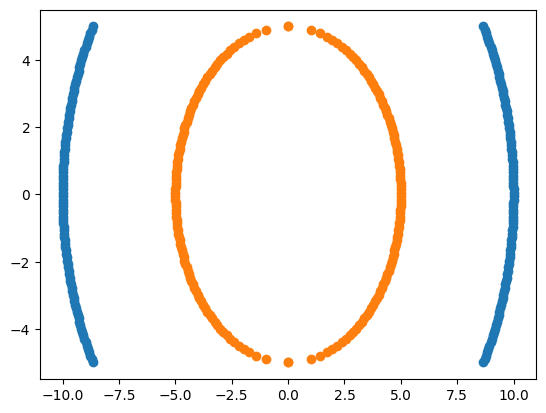

In [ ]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [ ]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y']=1
df=df1.append(df2)
df.head(5)

<ipython-input-21-6c4bbbebc41a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


,X1,X2,Y
0,-8.660254,-5.00000,0
1,-8.717792,-4.89899,0
2,-8.773790,-4.79798,0
3,-8.828277,-4.69697,0
4,-8.881281,-4.59596,0


In [ ]:
#Training and Test Data
X=df.iloc[:, :2]
y=df.Y

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [ ]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
y_train

50     NaN
63     0.0
112    NaN
159    0.0
83     NaN
      ... 
123    NaN
192    0.0
117    0.0
47     0.0
172    0.0
Name: Y, Length: 300, dtype: float64

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.45

In [ ]:
df.head()

,X1,X2,Y
0,-8.660254,-5.00000,0
1,-8.717792,-4.89899,0
2,-8.773790,-4.79798,0
3,-8.828277,-4.69697,0
4,-8.881281,-4.59596,0


Polynomial Kernel

In [ ]:
df['X1_squared']=df['X1']**2
df['X2_squared']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()


,X1,X2,Y,X1_sqaured,X2_squared,X1*X2,X1_squared
0,-8.660254,-5.00000,0,75.000000,25.000000,43.301270,75.000000
1,-8.717792,-4.89899,0,75.999898,24.000102,42.708375,75.999898
2,-8.773790,-4.79798,0,76.979390,23.020610,42.096467,76.979390
3,-8.828277,-4.69697,0,77.938476,22.061524,41.466150,77.938476
4,-8.881281,-4.59596,0,78.877155,21.122845,40.818009,78.877155


In [ ]:
#independent and dependentfeatures
X=df[['X1', 'X2', 'X1_squared', 'X2_squared', 'X1*X2']]
y=df['Y']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,X1,X2,X1_squared,X2_squared,X1*X2
50,-4.999745,-0.050505,24.997449,0.002551,0.252512
63,-9.906589,1.363636,98.140496,1.859504,-13.508984
112,3.263736,-3.787879,10.651974,14.348026,-12.362637
159,9.953852,-0.959596,99.079176,0.920824,-9.551676
83,-3.680983,-3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,4.223140,-2.676768,17.834915,7.165085,-11.304366
192,9.031653,-4.292929,81.570758,18.429242,-38.772248
117,9.445795,3.282828,89.223038,10.776962,31.008922
47,-9.996811,-0.252525,99.936231,0.063769,2.524447


In [ ]:
import plotly.express as px
fig=px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [ ]:
fig=px.scatter_3d(df, x='X1_sqaured', y='X2_squared', z='X1*X2', color='Y')
fig.show()

In [ ]:
classifier=SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_pred, y_test)

1.0